In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score

In [37]:
cdp_ghg_change = pd.read_csv('../../data/processed/cdp_ghg_change_processed.csv')

In [70]:
cdp_ghg_change.loc[cdp_ghg_change['id'] == 9759]

,id,year,ghg_change_total,ghg_change_real,ghg_change_structure,ghg_change_measure,ghg_change_othergroup,nonzero_categories_count,ghg_change_real_cat,ghg_change_real_cat_next
6965,9759,2018.0,4.0,0.0,0.0,0.0,4.0,1,0,1.0
6966,9759,2019.0,7.2,-4.4,0.0,0.0,11.6,2,1,0.0
6967,9759,2020.0,17.6,0.0,0.0,0.0,17.6,1,0,1.0
6968,9759,2021.0,-58.0,-5.0,0.0,0.0,-53.0,2,1,0.0


In [38]:
# drop columns with na in the target variable
cdp_ghg_change = cdp_ghg_change.dropna()

In [51]:
cdp_ghg_change

,id,year,ghg_change_total,ghg_change_real,ghg_change_structure,ghg_change_measure,ghg_change_othergroup,nonzero_categories_count,ghg_change_real_cat,ghg_change_real_cat_next
0,44,2011.0,-11.00,-11.0,0.00,0.0,0.0,1,1,0.0
1,44,2012.0,-25.00,0.0,0.00,0.0,-25.0,1,0,1.0
2,44,2013.0,-19.00,-1.0,0.00,-1.0,-17.0,3,1,0.0
3,44,2014.0,-29.00,0.0,0.00,0.0,-29.0,1,0,0.0
4,44,2016.0,-4.00,0.0,0.00,0.0,-4.0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...
21961,863212,2021.0,0.00,0.0,0.00,0.0,0.0,0,0,0.0
21962,863221,2021.0,0.00,0.0,0.00,0.0,0.0,0,0,0.0
21963,863244,2021.0,7.19,0.0,7.19,0.0,0.0,1,0,1.0
21964,863247,2021.0,0.00,0.0,0.00,0.0,0.0,0,0,1.0


In [40]:
# Split the dataset into train and test sets
train_data = cdp_ghg_change[cdp_ghg_change['year'] < 2021]
test_data = cdp_ghg_change[cdp_ghg_change['year'] == 2021]

# Define the features and target variable
X_train = train_data.drop(columns=['ghg_change_real_cat_next', 'id'])
y_train = train_data['ghg_change_real_cat_next']
X_test = test_data.drop(columns=['ghg_change_real_cat_next', 'id'])
y_test = test_data['ghg_change_real_cat_next']

In [41]:
X_test['ghg_change_real_cat']

9        0
20       1
21       0
32       1
37       0
        ..
21961    0
21962    0
21963    0
21964    0
21965    0
Name: ghg_change_real_cat, Length: 4377, dtype: int64

In [42]:
(X_test['ghg_change_real_cat'] == y_test).mean() * 100

78.91249714416266

In [43]:
y_train.isna().mean()

0.0

In [44]:
y_train.value_counts(normalize=True)

ghg_change_real_cat_next
1.0    0.67889
0.0    0.32111
Name: proportion, dtype: float64

In [45]:
y_test.value_counts(normalize=True)

ghg_change_real_cat_next
0.0    0.528901
1.0    0.471099
Name: proportion, dtype: float64

In [46]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_clf.predict(X_test)

# Calculate and print accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.783641763765136


In [47]:
# print training and test set accuracy
print("Training set accuracy: {:.3f}".format(best_clf.score(X_train, y_train)))

Training set accuracy: 0.793


In [48]:
# print best parameters
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


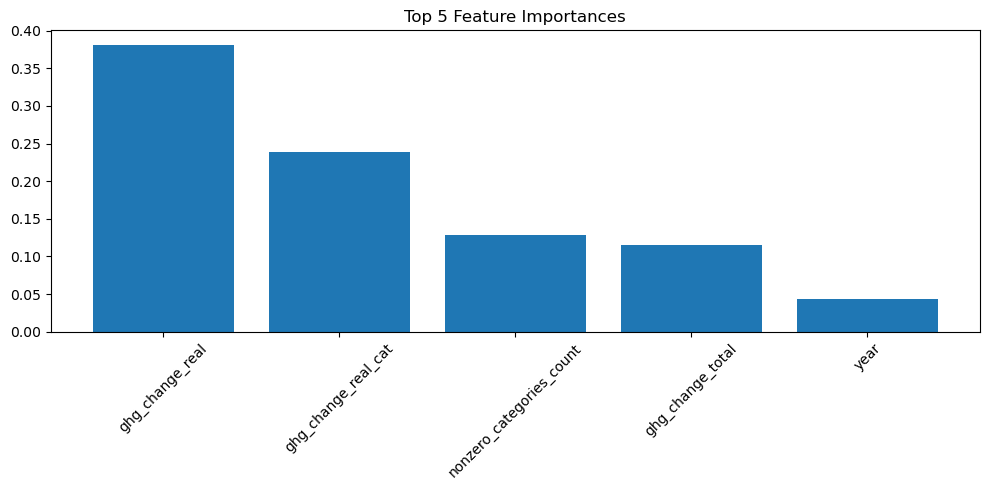

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [52]:
# Get feature importances using the best estimator
importances = best_clf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot the top 10 feature importances
top_n = 5
plt.figure(figsize=(10, 5))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=45)
plt.tight_layout()
plt.show()

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

In [53]:
y_test.value_counts()

ghg_change_real_cat_next
0.0    2315
1.0    2062
Name: count, dtype: int64

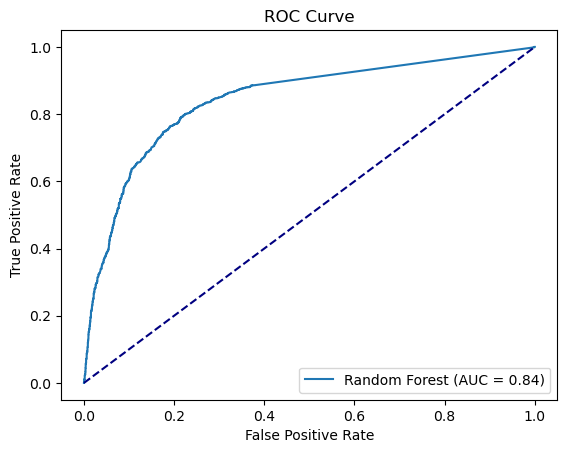

In [55]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = best_clf.predict_proba(X_test)[:, 1]

# Get false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)

# Get area under the curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
roc_display.plot()
# diplay a diagonal line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.show()

In [56]:
# calculate fpr and trp for treshold 0.5
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
# calculate optimal treshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold: {:.3f}".format(optimal_threshold))

Optimal Threshold: 0.582


In [57]:
# calculate accuracy for treshold 0.433
y_pred = np.where(y_prob > optimal_threshold, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.3f}".format(accuracy))

Test Set Accuracy: 0.787


In [58]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [62]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


def stepwise_forward_selection(X_train, y_train, X_test, y_test):
    included = []
    accuracy_scores = []
    while True:
        changed = False
        excluded = list(set(X_train.columns) - set(included))
        new_accuracy = 0
        new_feature = None
        for new_column in excluded:
            model = sm.Logit(y_train, sm.add_constant(X_train[included + [new_column]])).fit(disp=0, maxiter=100)
            p_values = model.pvalues[1:]  # we are not interested in the p-value of the intercept
            if max(p_values) < 0.05:  # using p-value < 0.05 as the criterion to include a variable
                # Add a constant to the test data
                X_test_with_const = sm.add_constant(X_test[included + [new_column]], has_constant='add')
                y_pred = model.predict(X_test_with_const)
                y_pred = (y_pred > 0.5).astype(int)  # using 0.5 as the cutoff for classification
                accuracy = accuracy_score(y_test, y_pred)
                if accuracy > new_accuracy:
                    new_accuracy = accuracy
                    new_feature = new_column
                    changed = True
        print(model.summary())
        if changed:
            included.append(new_feature)
            accuracy_scores.append(new_accuracy)
            print(f'Added {new_feature} with new accuracy: {new_accuracy}')
        else:
            # No new features improve the model, so we stop here
            break

    return included, accuracy_scores

# Run the function with the mock data
included_features, accuracy_scores = stepwise_forward_selection(X_train, y_train, X_test, y_test)

                              Logit Regression Results                              
Dep. Variable:     ghg_change_real_cat_next   No. Observations:                17589
Model:                                Logit   Df Residuals:                    17587
Method:                                 MLE   Df Model:                            1
Date:                      Sun, 19 Nov 2023   Pseudo R-squ.:                0.001292
Time:                              16:31:01   Log-Likelihood:                -11026.
converged:                             True   LL-Null:                       -11041.
Covariance Type:                  nonrobust   LLR p-value:                 9.266e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7505      0.016     46.415      0.000       0.719       0.782
ghg_change_total    -0.0019      0.000     -5.215      0.000     

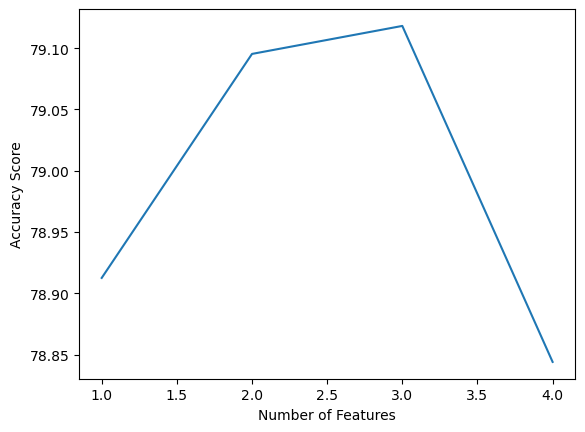

In [63]:
# plot the accuracy score for each iteration
plt.plot(range(1, len(accuracy_scores) + 1), np.multiply(accuracy_scores, 100))
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.show()